In [ ]:
# Scipy 라이브러리 사용..

### 1. T-검정 : 한 집단 평균 검정
### ...- 단일 집단 검정(one sample t-test)

In [ ]:
'''
하나의 데이터 집단의 평균과 비교하고자 하는 관측 평균값을 통해
차이를 검정하는 방법

데이터 집단의 평균과 거리가 가까울 수록 귀무가설 채택(평균 차이가 없다)
    - p-value 유의수준의 값이 높아진다 (p-value >= 0.05)
    
데이터 집단의 평균과 거리가 멀 수록 대립가설 채택(평균 차이가 있다)
    - p-value 유의수준의 값이 낮아진다 (p-value < 0.05)
    
사용 함수 : stats.ttest_1samp(x, y) , 한 집단(x), 관측평균값(y)
'''

### exe-1) 학생 키에 대한 평균 차이 검정

In [3]:
# 랜덤한 데이터 생성에 사용
import numpy as np

# T-검정에 사용되는 라이브러리 stats
from scipy import stats

In [11]:
# 데이터 생성하기
height_list = np.array([169, 167, 175, 166, 162, 180, 172,
                        162, 173, 162, 181, 175, 181, 181,
                        162, 165, 172, 176, 167, 165])
height_list
print('평균 = ', height_list.mean())

평균 =  170.65


In [27]:
# 한집단 검증하기
# 관측 평균값 정의
pmean = 165

tTestResult = stats.ttest_1samp(height_list, popmean = pmean)
print('한 집단 평균 검정 (단일 표본검정) = ', tTestResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tTestResult))

# (해석)
# 1. p-value = 0.002 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=3.6742535450095763, pvalue=0.0016115867466840847)
t-검정 통계량 = 3.674, p-value = 0.002


### exe-2) 어느 남성 집단의 평균 키 검정
###### - 귀무가설 : 남성 집단의 평균 키는 177이다. 샘플의 평균과 모집단의 평균은 같다.
###### - 대립가설 : 남성 집단의 평균 키는 177이 아니다. 샘플의 평균과 모집단의 평균은 다르다.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [24]:
### 데이터 생성하기
one_sample = [177.0, 182.7, 169.6, 176.8, 180.0]
print('one_sample 평균 = ', np.array(one_sample).mean())

one_sample2 = [167.0, 162.7, 169.6, 176.8, 170.0]
print('one_sample2 평균 = ', np.array(one_sample2).mean())

one_sample 평균 =  177.21999999999997
one_sample2 평균 =  169.21999999999997


In [41]:
# one_sample 평균차이 검증하기...
pmean = 177
result1 = stats.ttest_1samp(one_sample, popmean = pmean)
print('한 집단 평균 검정 (단일 표본검정) = ', result1)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result1))

# (해석)
# 1. p-value = 0.925 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 거의 유사하다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=0.10039070766877535, pvalue=0.9248646407498543)
t-검정 통계량 = 0.100, p-value = 0.925


In [42]:
# one_sample2 평균차이 검증하기...
result2 = stats.ttest_1samp(one_sample2, popmean = pmean)
print('한 집단 평균 검정 (단일 표본검정) = ', result2)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result2))

# (해석)
# 1. p-value = 0.028 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=-3.3850411682038235, pvalue=0.02765632703927135)
t-검정 통계량 = -3.385, p-value = 0.028


In [45]:
# one_sample2 평균차이 검증하기...
result3 = stats.ttest_1samp(one_sample, popmean = 165)
print('한 집단 평균 검정 (단일 표본검정) = ', result3)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result3))

# (해석)
# 1. p-value = 0.028 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=5.576247489602712, pvalue=0.00506954215945913)
t-검정 통계량 = 5.576, p-value = 0.005


### exe-3) 어느 집단 자료 평균 검정
##### - 귀무가설 : 자료들의 평균은 0이다.
##### - 대립가설 : 자료들의 평균은 0이 아니다.

In [56]:
# 데이터 생성하기
np.random.seed(123)

# 난수 평균 변수
nCnt = 0

# 생성할 난수의 갯수
mValue = 10

# 평균이 0인 정규분포를 따르는 난수 10개 생성
x = stats.norm(nCnt).rvs(mValue)
print('생성된 난수 = ', x)
print('10개 평균', np.mean(x))

생성된 난수 =  [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
10개 평균 -0.26951611032632805


In [57]:
# 정규성 검정 (stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적..
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다..

resultSh = stats.shapiro(x)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.866 > 0.05 이므로, 정규성을 만족한다

정규성 검정 결과 =  ShapiroResult(statistic=0.9674148559570312, pvalue=0.8658965229988098)
검정 통계량 = 0.967, p-value = 0.866


C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\DEV\Tools\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


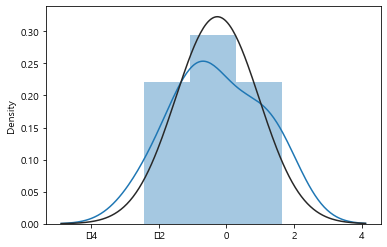

In [58]:
# 정규분포 시각화
import seaborn as sns

# 한글 처리
plt.rc('font', family = 'Malgun Gothic')

# x : 데이터 집합
# stats.norm : 정규분포 표시
sns.distplot(x, fit=stats.norm)
plt.show()

In [59]:
result = stats.ttest_1samp(x, popmean = 0)
print('한 집단 평균 검정 (단일 표본검정) = ', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.529 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 거의 유사하다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=-0.6540040368674593, pvalue=0.5294637946339893)
t-검정 통계량 = -0.654, p-value = 0.529


In [60]:
result = stats.ttest_1samp(x, popmean = 0)
print('한 집단 평균 검정 (단일 표본검정) = ', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.029 > 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=-0.6540040368674593, pvalue=0.5294637946339893)
t-검정 통계량 = -0.654, p-value = 0.529


### exe-4) 중학교 1개반 학생들의 시험결과가 담긴 student.csv 사용
#### 귀무가설 : 학생들의 국어점수의 평균은 80점이다.
#### 대립가설 : 학생들의 국어점수의 평균은 80점이 아니다.

In [61]:
# 데이터 생성 : student.csv 사용
file_path = './data/student.csv'
df = pd.read_csv(file_path)
x = np.array(df['국어'])
x

array([90, 80, 87, 55, 66, 78, 45, 78, 95, 78, 55, 99, 88, 78, 67, 73, 92,
       91, 98], dtype=int64)

In [62]:
# 정규성 검정

resultSh = stats.shapiro(x)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.220 > 0.05 이므로, 정규성을 만족한다

정규성 검정 결과 =  ShapiroResult(statistic=0.9356319904327393, pvalue=0.21971704065799713)
검정 통계량 = 0.936, p-value = 0.220


C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


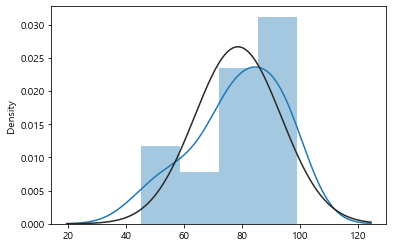

In [64]:
# 정규분포 시각화
import seaborn as sns

# 한글 처리
plt.rc('font', family = 'Malgun Gothic')

# x : 데이터 집합
# stats.norm : 정규분포 표시
sns.distplot(x, fit=stats.norm)
plt.show()

In [63]:
# 평균차이 검정
result = stats.ttest_1samp(x, popmean = 80)
print('한 집단 평균 검정 (단일 표본검정) = ', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.692 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 한개의 집단과 관측값의 평균은 서로 유사하다
#                  : 국어점수의 평균은 80에 가깝다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=-0.40289533293226004, pvalue=0.6917702523394662)
t-검정 통계량 = -0.403, p-value = 0.692


In [65]:
# 평균차이 검정
result = stats.ttest_1samp(x, popmean = 60)
print('한 집단 평균 검정 (단일 표본검정) = ', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.000 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다
#                  : 국어점수의 평균은 60에 가깝지 않다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=5.2674834268551125, pvalue=5.222868685761389e-05)
t-검정 통계량 = 5.267, p-value = 0.000


### exe-5) 여아 신생아 몸무게의 평균 검정
#### 분석 근거 : 일반적으로 여아 신생아의 몸무게의 평균은 2800g으로 알려져왔으나, 일부에서는 이보다 크다고 주장하고 있다.. 누가 맞을까?

In [86]:
# 사용 데이터 : babyboom.csv(성별 : 1-여아, 2-남아)
file_path = './data/babyboom.csv'
df = pd.read_csv(file_path)
x = df[df['gender'] == 1]['weight']
x

0     3837
1     3334
5     2208
6     1745
12    2576
13    3208
15    3746
16    3523
21    3430
22    3480
23    3116
24    3428
28    2184
30    2383
36    3500
41    3866
42    3542
43    3278
Name: weight, dtype: int64

In [87]:
# 정규성 확인

resultSh = stats.shapiro(x)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.018 <= 0.05 이므로, 정규성을 만족하지 않는다.

정규성 검정 결과 =  ShapiroResult(statistic=0.8702831864356995, pvalue=0.017984945327043533)
검정 통계량 = 0.870, p-value = 0.018


C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


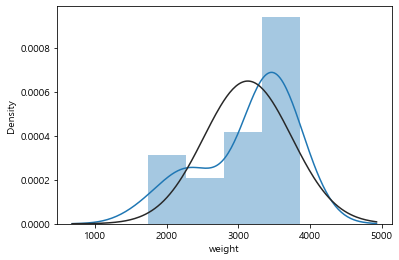

In [88]:
# 정규분포 시각화
# x : 데이터 집합
# stats.norm : 정규분포 표시
sns.distplot(x, fit=stats.norm)
plt.show()

In [91]:
# 평균차이 검정
result = stats.ttest_1samp(x, popmean = 2800)
print('한 집단 평균 검정 (단일 표본검정) = ', result)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(result))

# (해석)
# 1. p-value = 0.039 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 한개의 집단과 관측값의 평균은 서로 같지 않다.
#                  : 여아 신생아의 평균 몸무게는 2800g보다 크지만
#                    수집된 데이터가 정규성을 띄지않아 문제가 있는 것으로 보임

np.mean(x)

한 집단 평균 검정 (단일 표본검정) =  Ttest_1sampResult(statistic=2.233187669387536, pvalue=0.03926844173060218)
t-검정 통계량 = 2.233, p-value = 0.039


3132.4444444444443